In [29]:
%load_ext autoreload
%autoreload 2

import os
import sys

module_path = os.path.abspath(os.path.join("../"))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import gym
import matplotlib.pyplot as plt
from dacite import from_dict
from dqn.buffer import ReplayBuffer
from dqn.func_q_learning import DQN, Epsilon, QLearningCongfig, train_dqn
from dqn.q_agent import Agent

In [17]:
cartpole = gym.make("CartPole-v1")
print(cartpole.action_space)
print(cartpole.observation_space)
print(cartpole.env.metadata)

Discrete(2)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
{'render.modes': ['human', 'rgb_array'], 'video.frames_per_second': 50}


In [18]:
memory = ReplayBuffer(10000)
memory.populate(cartpole, num_episodes=500, steps_per_episode=500, action_size=2)

len(memory)

100%|███████████████████████████████████████████████████| 500/500 [00:00<00:00, 3149.34it/s]


10000

In [48]:
state, action, reward, done, new_state = memory.sample(1)

In [49]:
action_size = 2
obs_size = len(state[0])

In [50]:
agent = Agent(patient=cartpole, action_size=2)

In [51]:
policy_net = DQN(obs_size, action_size)
target_net = DQN(obs_size, action_size)

In [73]:
q_conf_dict = {
    "gamma": 0.99,
    "batch_size": 256,
    "learning_rate": 0.0001,
    "num_episodes": 5000,
    "steps_per_episode": 500,
    "target_update_rate": 200,
}
eps_conf_dict = {
    "max": 1,
    "min": 0.1,
    "delay": 200,
}

In [74]:
q_conf = from_dict(data_class=QLearningCongfig, data=q_conf_dict)
eps_conf = from_dict(data_class=Epsilon, data=eps_conf_dict)

In [75]:
rewards, losses, epsilons = train_dqn(
    patient=cartpole,
    memory=memory,
    agent=agent,
    policy_net=policy_net,
    target_net=target_net,
    q_conf=q_conf,
    eps_conf=eps_conf,
)

100%|██████████████████████████████████████████████| 5000/5000 [03:18<00:00, 25.25episode/s]


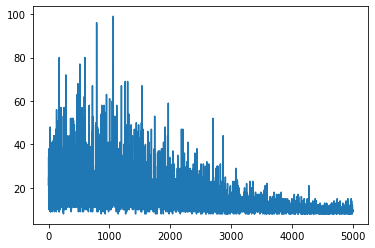

In [79]:
plt.plot(rewards)

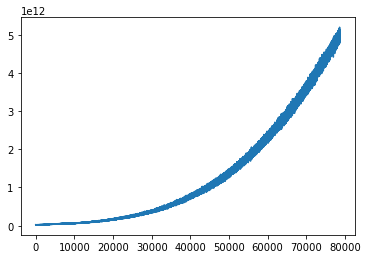

In [80]:
plt.plot(losses)

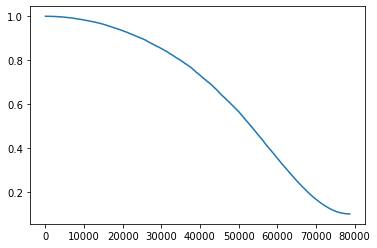

In [81]:
plt.plot(epsilons)